<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Nitrogen/Nitrogen_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Colab Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


In [4]:
data = pd.read_csv("nitrogen_data.csv")

In [5]:
HUC12 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/HUC_12.csv")
HUC12.rename(columns={'NAME': 'Sub-watershed'}, inplace=True)

In [6]:
station_names = pd.read_csv("station_names.csv")

**1. Clean up dataframe**

In [7]:
# drop rows with numeric value in Station column
data = data.iloc[::2]
data = data.reset_index(drop=True)

In [8]:
# pull apart data variable
data[['Date_2', 'Time_2']] = data['Date'].str.split(' ', expand=True)
data['Year'] = data['Date_2'].str.slice(-4,)
data['Month'] = data['Date_2'].str.slice(0,2)
data['Month'] = data['Month'].str.replace('/', '')

In [9]:
# drop original data columns
data.drop('Date_2', axis=1, inplace=True)
data.drop('Time_2', axis=1, inplace=True)

In [10]:
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data.head(20)

,Station,ID,Address,Date,TSS,DO,P,ENT,Sal,Temp,pH,CHL_A,N,Year,Month
0,Cow Bridge Branch,308281,Zoar Rd. (Rd. 48),11/28/2023 4:08,3.6,9.84,0.03,41,0.05,7.7,6.3,5.32,1.41,2023,11
1,Indian River Inlet,306321,Coast Guard Station,11/28/2023 8:08,22.3,8.72,0.03,5,34.83,10.6,7.7,5.12,0.25,2023,11
2,Little Assawoman Bay Mid-Bay (Ocean Park Lane),310071,NaN,11/28/2023 8:34,8.9,10.04,0.03,20,27.31,6.8,7.5,7.7,0.38,2023,11
3,Little Assawoman Bay,310011,Rt. 54 (The Ditch),11/28/2023 8:49,7.0,9.80,0.00,5,28.66,8.0,7.6,7.03,0.32,2023,11
4,Buntings Branch,311041,Fenwick Rd. (Rt. 54),11/28/2023 9:01,1.6,10.55,0.04,198,0.13,6.6,6.6,1.37,4.58,2023,11
5,Dirickson Creek,310031,Old Mill Bridge Rd. (Rd. 381),11/28/2023 9:09,8.8,10.76,0.01,160,16.01,8.0,7.5,63.5,1.30,2023,11
6,Beaver Dam Ditch,310121,Beaver Dam Rd. (Rd. 368),11/28/2023 9:22,14.7,10.59,0.05,83,0.50,6.6,7.1,10.6,1.64,2023,11
7,Pepper Creek,308091,Main St. (Rt. 26),11/28/2023 9:25,4.5,10.82,0.06,139,0.11,7.4,6.5,0.92,2.84,2023,11
8,Whartons Branch,309041,Dagsboro Rd. (Rt. 20),11/28/2023 9:40,6.8,11.07,0.03,197,0.11,7.5,6.4,1.54,4.34,2023,11
9,Blackwater Creek,308361,Omar Rd. (Rd. 54),11/28/2023 9:55,1.9,10.62,0.02,90,0.18,9.4,6.6,4.24,3.89,2023,11


**2. Assign row to HUC watershed**

In [11]:
HUC12.head()

,OBJECTID,TNMID,METASOURCEID,SOURCEDATADESC,SOURCEORIGINATOR,SOURCEFEATUREID,LOADDATE,GNIS_ID,AREAACRES,AREASQKM,STATES,HUC12,Sub-watershed,HUTYPE,HUMOD,TOHUC,NONCONTRIBUTINGACRES,NONCONTRIBUTINGSQKM,SHAPEAREA,SHAPELEN
0,1,{A462BFFC-6E58-472A-9996-D8EE655030A4},NaN,NaN,NaN,NaN,2013/01/18 07:08:10+00,NaN,265272,1073.518646,"DE,NJ",20402040000,Delaware Bay-Deep,W,NM,020403030602,0,0,1.785336e+09,434324.014931
1,2,{CF352971-E29C-4525-9F38-DB83BFC08201},NaN,NaN,NaN,NaN,2013/01/18 07:08:24+00,NaN,21663,87.667128,MD,20600050505,Broad Creek-Choptank River,F,TF,020600050508,0,0,1.443111e+08,67408.207497
2,3,{404E76F0-3451-496F-8041-8709888DDAF0},NaN,NaN,NaN,NaN,2013/01/18 07:08:24+00,NaN,16137,65.304180,MD,20801100201,Buttons Creek-Blackwater River,S,"IT,SD",020801100203,0,0,1.066649e+08,54865.397476
3,4,{B54B007C-BB51-4226-B14B-AF5D41AE637C},NaN,NaN,NaN,NaN,2013/01/18 07:08:24+00,NaN,24715,100.018145,MD,20600050401,Fishing Creek-Little Choptank River,S,TF,020600050402,0,0,1.637644e+08,64731.728568
4,5,{8E6414A4-0396-4085-8A3E-F8FC2CF2DA44},NaN,NaN,NaN,NaN,2013/01/18 07:08:24+00,NaN,38827,157.127433,MD,20600050504,Tred Avon River-Choptank River,F,TF,020600050508,0,0,2.584963e+08,77949.760542


In [12]:
# remove whitespaces
station_names = station_names.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [13]:
# convert to dictionary and drop nan
station_names_reindexed = station_names.set_index('Nitrogen_Station')
stations_dict = station_names_reindexed.to_dict(orient='index')
for key, value in stations_dict.items():
    stations_dict[key] = {k: v for k, v in value.items() if not pd.isna(v)}

In [14]:
# combine values into list
stations_dict_2 = {}
for station in station_names["Nitrogen_Station"]:
  s_dict = stations_dict.get(station)
  values_list = list(s_dict.values())
  stations_dict_2[station] = values_list

In [15]:
# add HUC watersheds to row where possible
watersheds = []
for i in range(0,len(data)):
  if not stations_dict_2[data["Station"][i]]:
    watersheds.append('')
  else:
    watersheds.append(stations_dict_2[data["Station"][i]][0])
data['Sub-watershed'] = watersheds

In [16]:
# drop rows without watershed mapping
data['Sub-watershed'].replace('', np.nan, inplace=True)
data.dropna(subset=['Sub-watershed'], inplace=True);

In [17]:
data.head(10)

,Station,ID,Address,Date,TSS,DO,P,ENT,Sal,Temp,pH,CHL_A,N,Year,Month,Sub-watershed
0,Cow Bridge Branch,308281,Zoar Rd. (Rd. 48),11/28/2023 4:08,3.6,9.84,0.03,41,0.05,7.7,6.3,5.32,1.41,2023,11,Cow Bridge Branch-Indian River
1,Indian River Inlet,306321,Coast Guard Station,11/28/2023 8:08,22.3,8.72,0.03,5,34.83,10.6,7.7,5.12,0.25,2023,11,Indian River Bay-Indian River Inlet
2,Little Assawoman Bay Mid-Bay (Ocean Park Lane),310071,NaN,11/28/2023 8:34,8.9,10.04,0.03,20,27.31,6.8,7.5,7.7,0.38,2023,11,Assawoman Bay
3,Little Assawoman Bay,310011,Rt. 54 (The Ditch),11/28/2023 8:49,7.0,9.80,0.00,5,28.66,8.0,7.6,7.03,0.32,2023,11,Little Assawoman Bay
6,Beaver Dam Ditch,310121,Beaver Dam Rd. (Rd. 368),11/28/2023 9:22,14.7,10.59,0.05,83,0.50,6.6,7.1,10.6,1.64,2023,11,Beaverdam Creek-Broadkill River
9,Blackwater Creek,308361,Omar Rd. (Rd. 54),11/28/2023 9:55,1.9,10.62,0.02,90,0.18,9.4,6.6,4.24,3.89,2023,11,Buttons Creek-Blackwater River
11,White Creek,312011,mouth of Assawoman Canal,11/28/2023 10:14,3.1,9.84,0.02,5,28.19,8.5,7.2,2.73,0.38,2023,11,Lower White Clay Creek
12,Swan Creek,308341,Mount Joy Rd. (Rd. 297),11/28/2023 11:15,0.5,10.18,0.01,29,0.05,8.5,6.2,0.5,2.47,2023,11,Swan Creek-Indian River
16,Rehoboth Bay,306091,Buoy 7,11/29/2023 8:20,13.9,10.38,0.04,10,29.03,3.4,7.9,8.46,0.26,2023,11,Herring Creek-Rehoboth Bay
19,Indian River Bay,306121,Buoy 20,11/29/2023 9:08,10.3,10.78,0.02,20,27.40,2.6,8.1,13.8,0.31,2023,11,Indian River Bay-Indian River Inlet


In [18]:
data.shape

(1963, 16)

**3. Use only one measure for each station**

In [19]:
data_final = pd.DataFrame()
stations = data["ID"].unique()
for i in range(0, len(stations)):
  new_row = data[data["ID"] == stations[i]]
  data_final = data_final._append(new_row.iloc[0], ignore_index=True)

In [20]:
data_final

,Station,ID,Address,Date,TSS,DO,P,ENT,Sal,Temp,pH,CHL_A,N,Year,Month,Sub-watershed
0,Cow Bridge Branch,308281,Zoar Rd. (Rd. 48),11/28/2023 4:08,3.6,9.84,0.03,41,0.05,7.7,6.3,5.32,1.41,2023,11,Cow Bridge Branch-Indian River
1,Indian River Inlet,306321,Coast Guard Station,11/28/2023 8:08,22.3,8.72,0.03,5,34.83,10.6,7.7,5.12,0.25,2023,11,Indian River Bay-Indian River Inlet
2,Little Assawoman Bay Mid-Bay (Ocean Park Lane),310071,NaN,11/28/2023 8:34,8.9,10.04,0.03,20,27.31,6.8,7.5,7.7,0.38,2023,11,Assawoman Bay
3,Little Assawoman Bay,310011,Rt. 54 (The Ditch),11/28/2023 8:49,7.0,9.80,0.00,5,28.66,8.0,7.6,7.03,0.32,2023,11,Little Assawoman Bay
4,Beaver Dam Ditch,310121,Beaver Dam Rd. (Rd. 368),11/28/2023 9:22,14.7,10.59,0.05,83,0.50,6.6,7.1,10.6,1.64,2023,11,Beaverdam Creek-Broadkill River
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Trib Army Crk.,114041,Rt. 13 near Airport Ind. Park,12/7/2022 9:43,16.5,10.43,0.07,1370,0.05,10.4,7.0,0.6,1.01,2022,12,Army Creek-Delaware River
86,Trib Army CreeK,114051,Rt. 13 near Rt. 40,12/7/2022 9:31,2.4,11.37,0.07,4840,0.05,10.3,7.1,0.61,1.09,2022,12,Army Creek-Delaware River
87,Murderkill River near levee,206141,MNWA (RM 3.25),12/8/2022 8:35,56.3,10.82,0.08,134,15.28,9.2,7.6,11,1.79,2022,12,Spring Branch-Murderkill River
88,Murderkill Rv.,206231,confl. of KCWWTF discharge ditch,12/8/2022 8:45,39.1,8.97,0.22,870,1.65,11.9,7.7,11.8,2.65,2022,12,Spring Branch-Murderkill River


In [21]:
data_final.shape

(90, 16)

**4. Use only one stations within the same watershed if more than one**

In [22]:
data_final_2 = pd.DataFrame()
sheds = data_final["Sub-watershed"].unique()
for i in range(0, len(sheds)):
  new_row = data_final[data_final["Sub-watershed"] == sheds[i]]
  data_final_2 = data_final_2._append(new_row.iloc[0], ignore_index=True)

In [23]:
data_final_2

,Station,ID,Address,Date,TSS,DO,P,ENT,Sal,Temp,pH,CHL_A,N,Year,Month,Sub-watershed
0,Cow Bridge Branch,308281,Zoar Rd. (Rd. 48),11/28/2023 4:08,3.6,9.84,0.03,41,0.05,7.7,6.3,5.32,1.41,2023,11,Cow Bridge Branch-Indian River
1,Indian River Inlet,306321,Coast Guard Station,11/28/2023 8:08,22.3,8.72,0.03,5,34.83,10.6,7.7,5.12,0.25,2023,11,Indian River Bay-Indian River Inlet
2,Little Assawoman Bay Mid-Bay (Ocean Park Lane),310071,NaN,11/28/2023 8:34,8.9,10.04,0.03,20,27.31,6.8,7.5,7.7,0.38,2023,11,Assawoman Bay
3,Little Assawoman Bay,310011,Rt. 54 (The Ditch),11/28/2023 8:49,7.0,9.80,0.00,5,28.66,8.0,7.6,7.03,0.32,2023,11,Little Assawoman Bay
4,Beaver Dam Ditch,310121,Beaver Dam Rd. (Rd. 368),11/28/2023 9:22,14.7,10.59,0.05,83,0.50,6.6,7.1,10.6,1.64,2023,11,Beaverdam Creek-Broadkill River
5,Blackwater Creek,308361,Omar Rd. (Rd. 54),11/28/2023 9:55,1.9,10.62,0.02,90,0.18,9.4,6.6,4.24,3.89,2023,11,Buttons Creek-Blackwater River
6,White Creek,312011,mouth of Assawoman Canal,11/28/2023 10:14,3.1,9.84,0.02,5,28.19,8.5,7.2,2.73,0.38,2023,11,Lower White Clay Creek
7,Swan Creek,308341,Mount Joy Rd. (Rd. 297),11/28/2023 11:15,0.5,10.18,0.01,29,0.05,8.5,6.2,0.5,2.47,2023,11,Swan Creek-Indian River
8,Rehoboth Bay,306091,Buoy 7,11/29/2023 8:20,13.9,10.38,0.04,10,29.03,3.4,7.9,8.46,0.26,2023,11,Herring Creek-Rehoboth Bay
9,Indian River,306331,Island Creek,11/29/2023 9:32,30.3,11.24,0.01,31,22.31,4.0,8.5,85.3,1.03,2023,11,Vines Creek-Indian River


In [24]:
data_final_2.shape

(47, 16)

**5. Combine with HUC dataset**

In [25]:
# Construct the query URL for the API - gave chatgbt the API and asked how to load it
url = "https://enterprise.firstmap.delaware.gov/arcgis/rest/services/Hydrology/DE_Watersheds/MapServer/5/query"
params = {
    'where': '1=1',
    'outFields': '*',
    'outSR': '4326',
    'f': 'geojson'
}

response = requests.get(url, params=params)
gdf = gpd.GeoDataFrame.from_features(response.json(), crs='EPSG:4326')

print(gdf.head())
print(gdf.crs)

                                            geometry  OBJECTID  \
0  POLYGON ((-75.43456 39.78975, -75.44558 39.797...         1   
1  POLYGON ((-76.23539 38.8089, -76.23653 38.8099...         2   
2  POLYGON ((-76.0542 38.7884, -76.05482 38.7883,...         5   
3  POLYGON ((-76.10001 39.00446, -76.10185 39.004...         6   
4  POLYGON ((-76.03651 39.32178, -76.03845 39.322...        15   

                                    TNMID  \
0  {A462BFFC-6E58-472A-9996-D8EE655030A4}   
1  {CF352971-E29C-4525-9F38-DB83BFC08201}   
2  {8E6414A4-0396-4085-8A3E-F8FC2CF2DA44}   
3  {1C64393A-90D1-4478-A26A-0B1B15D7156A}   
4  {7808DB40-573D-4964-B0B1-BF7D2E6904BA}   

                             METASOURCEID SOURCEDATADESC SOURCEORIGINATOR  \
0                                    None           None             None   
1                                    None           None             None   
2                                    None           None             None   
3                       

<Axes: >

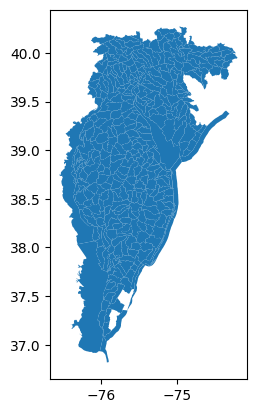

In [26]:
HUC12_gdf = gdf.merge(HUC12[['OBJECTID','Sub-watershed']], on='OBJECTID', how='left')
HUC12_gdf.plot()

<Axes: >

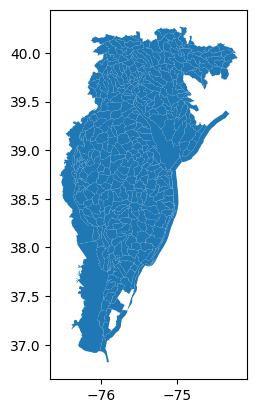

In [27]:
nitrogen_gdf = HUC12_gdf.merge(data_final_2, on='Sub-watershed', how='outer')
nitrogen_gdf.plot()

**NITROGEN**

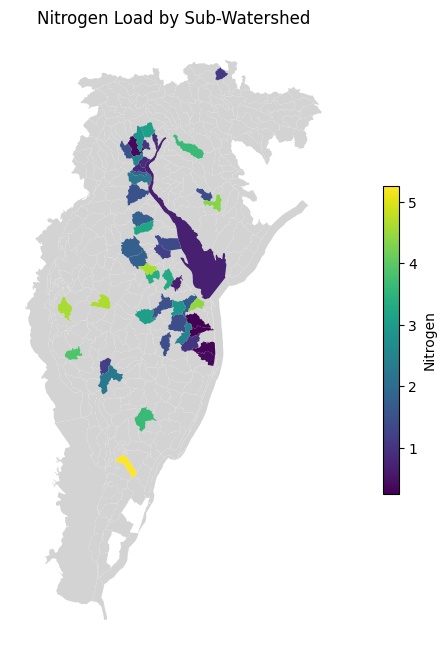

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
nitrogen_gdf.plot(ax=ax, color='lightgrey')
nitrogen_gdf.plot(ax=ax, column='N', cmap='viridis', legend=True,
                  legend_kwds={'shrink': 0.5, 'label': 'Nitrogen'})


plt.title('Nitrogen Load by Sub-Watershed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')
plt.show()

**PH**

In [29]:
vars = ["TSS","DO",	"P",	"Sal",	"Temp",	"pH"]

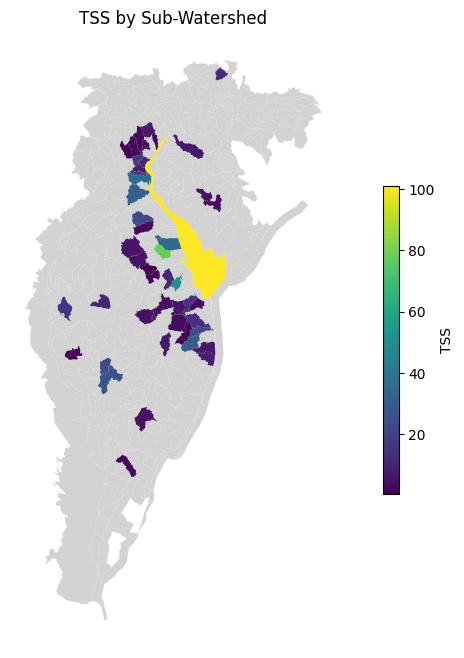

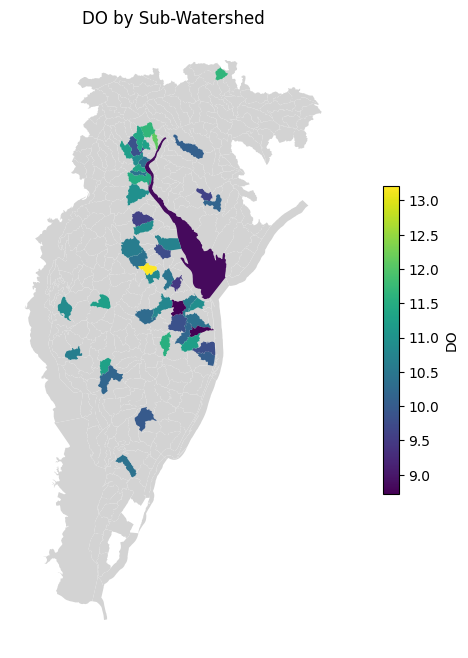

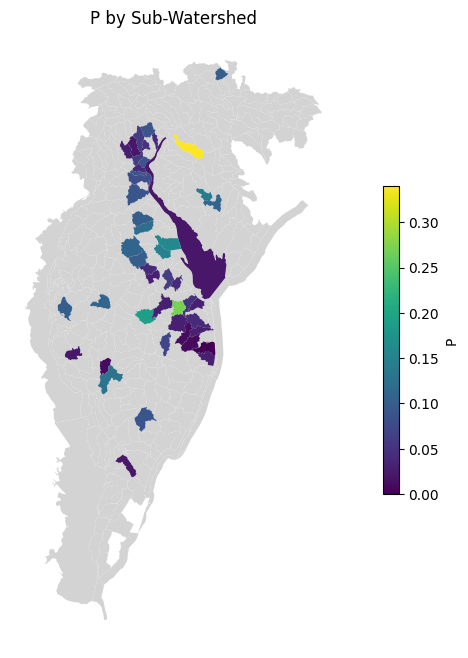

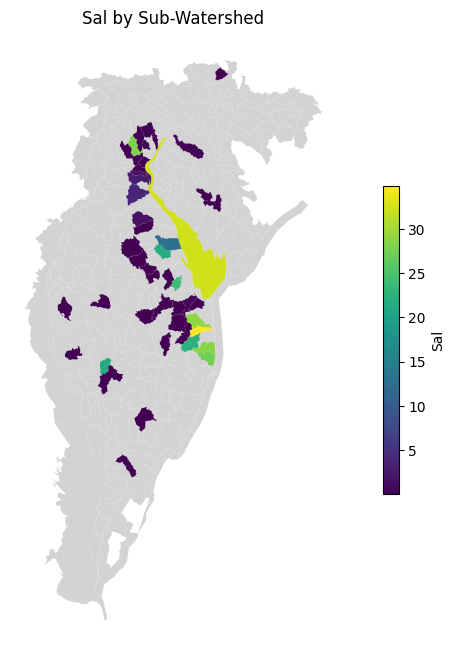

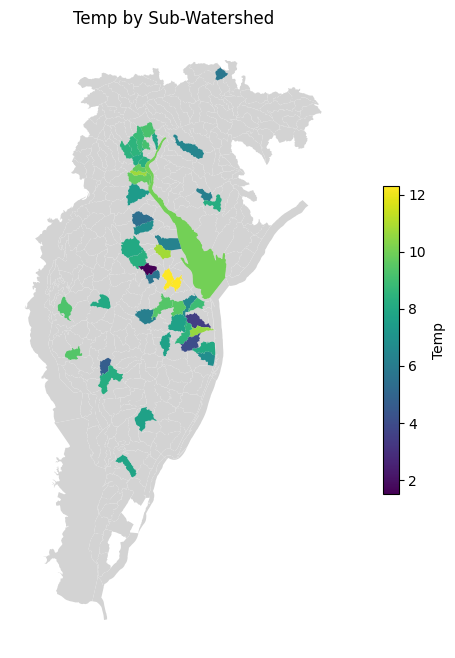

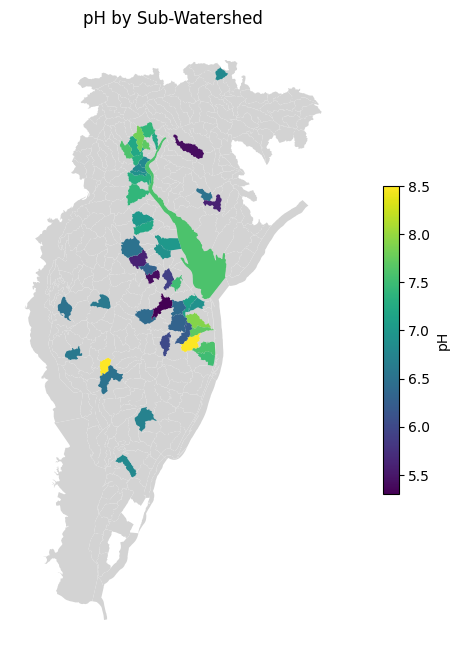

In [32]:
for var in vars:
  fig, ax = plt.subplots(1, 1, figsize=(12, 8))
  nitrogen_gdf.plot(ax=ax, color='lightgrey')
  nitrogen_gdf.plot(ax=ax, column=var, cmap='viridis', legend=True,
                    legend_kwds={"shrink":0.5,'label': var})


  plt.title(f'{var} by Sub-Watershed')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.axis('off')
  plt.show()

**6. Save data**

In [31]:
nitrogen_gdf.to_csv('nitrogen_HUC12.csv', index=False)